<a href="https://colab.research.google.com/github/DulanMahesh/Camera_works/blob/master/Module_08_02_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Edge Detection</h1>

Edge detection is an image-processing technique used to identify the boundaries (edges) of objects, or regions within an image. Edges are among the most important features associated with images. We come to know of the underlying structure of an image through its edges. Computer vision processing pipelines therefore extensively use edge detection in applications. In this notebook, we will explore how convolution is used to detect edges and will cover the following edge detection methods.

* Sobel Edge Detection
* Canny Edge Detection

<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m8-02-feature-image.png" alt="c0-m8-02-feature-image.png">
</center>
<br>

Edge detection is applied to grayscale images that are also often blurred prior to performing edge detection. Blurring is performed to reduce the noise in the image. In edge detection, numerical derivatives of the pixel intensities are computed, and this typically results in ‘noisy’ edges. In other words, the intensity of neighboring pixels in an image (especially near edges) can fluctuate quite a bit, giving rise to edges that don’t represent the predominant edge structure we are typically looking for. Blurring smooths the intensity variation near the edges, making it easier to identify the edge structure within the image.

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/287dmicr7k30m3q/AADpOe7w4ouuMp2cyA1uNFjva?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

# 1. Sobel Edge Detection using filter2D()

Sobel Edge Detection is one of the most widely used algorithms for edge detection. The Sobel Operator detects edges that are marked by sudden changes in pixel intensity. A sudden change in the derivative of intensity function will reveal a change in the pixel intensity as well. With this in mind, we can approximate the derivative, using a 3×3 kernel. We use one kernel to detect sudden changes in pixel intensity in the X direction, and another in the Y direction.

* X-direction Kernel : $$\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$

* Y-direction Kernel : $$\begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$$

When these kernels are convolved with the original image, you get a ‘Sobel edge image’.

 * If we use only the Vertical Kernel, the convolution yields a Sobel image, with edges enhanced in the X-direction
 * Using the Horizontal Kernel yields a Sobel image, with edges enhanced in the Y-direction.


## 1.1 Convolution Example
<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m8-02-sobel-edge-detection-a.png" alt="c0-m8-02-sobel-edge-detection-a.png">
</center>
<br>

<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m8-02-sobel-edge-detection-b.png" alt="c0-m8-02-sobel-edge-detection-b.png">
</center>
<br>

[[ 90  90  90  90  90  90  90  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  90  90  90  90  90  90  90]]

[[ -70.  -70.    0.  130.  130.    0.  -60.  -60.]
 [-210. -210.    0.  390.  390.    0. -180. -180.]
 [-280. -280.    0.  520.  520.    0. -240. -240.]
 [-280. -280.    0.  520.  520.    0. -240. -240.]
 [-280. -280.    0.  520.  520.    0. -240. -240.]
 [-280. -280.    0.  520.  520.    0. -240. -240.]
 [-210. -210.    0.  390.  390.    0. -180. -180.]
 [ -70.  -70.    0.  130.  130.    0.  -60.  -60.]]

[[ 66  66  89 130 130  89  70  70]
 [ 22  22  89 213 213  89  31  31]
 [  0   0  89 255 255  89  12  12]
 [  0   0  89 255 255  89  12  12]
 [  0   0  89 255 255  89  12  12]
 [  0   0  89 255 255  89  12  12]
 [ 22  22  89 213 213  89  31  31]
 [ 66  66  89 130 130  89  70  70]]


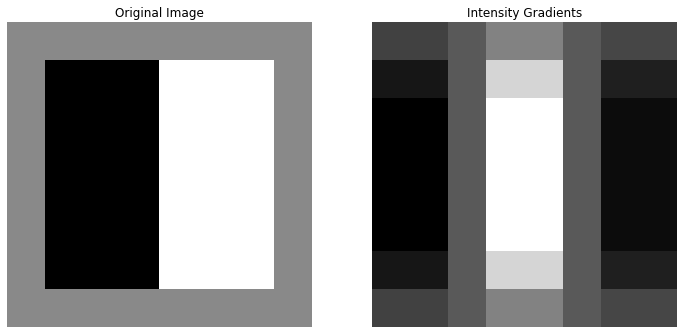

In [ ]:
image_8x8 = np.ones((8, 8), dtype = np.uint8)*90
image_8x8[1:7,1:4] = 20
image_8x8[1:7,4:7] = 150

print(image_8x8)
# Define the Sobel-X kernel.
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# Convolve the image with Sobel-X 3x3 kernel.
sobelx_filter2d = cv2.filter2D(src=image_8x8, ddepth=cv2.CV_64F, kernel=kernel, borderType=cv2.BORDER_REPLICATE)

# Print the filtered results (intensity gradients)
print('')
print(sobelx_filter2d)
print('')

# Example: Map gradients to [0, 255]
sobelx_filter2d = sobelx_filter2d - sobelx_filter2d.min()
sobelx_filter2d = sobelx_filter2d/sobelx_filter2d.max()
sobelx_filter2d = (sobelx_filter2d * 255).astype('uint8')
print(sobelx_filter2d)

plt.figure(figsize = (12, 10))
plt.subplot(121); plt.axis('off'); plt.imshow(image_8x8);       plt.title('Original Image')
plt.subplot(122); plt.axis('off'); plt.imshow(sobelx_filter2d); plt.title('Intensity Gradients');

## 1.2 Detect Vertical Edges using Sobel-X Kernel and filter2D()

### <font style = "color:rgb(50,120,229)">Convert to grayscale</font>

(800, 800, 3)


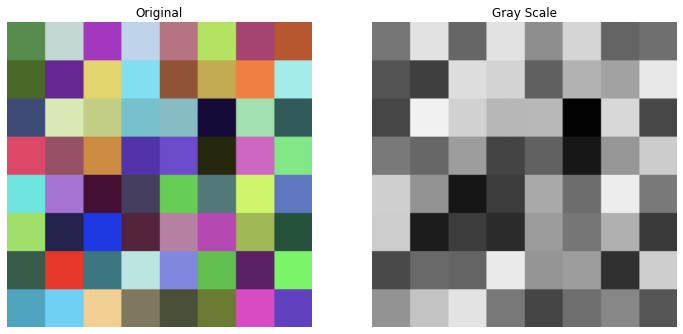

In [ ]:
# Read image.
img = cv2.imread('checkerboard_color.png')
# Convert to grayscale.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img.shape)

plt.figure(figsize = (12, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(img[:,:,::-1]); plt.title('Original')
plt.subplot(122); plt.axis('off'); plt.imshow(img_gray);      plt.title('Gray Scale');

### <font style = "color:rgb(50,120,229)">Define a Kernel and Apply Convolution</font>

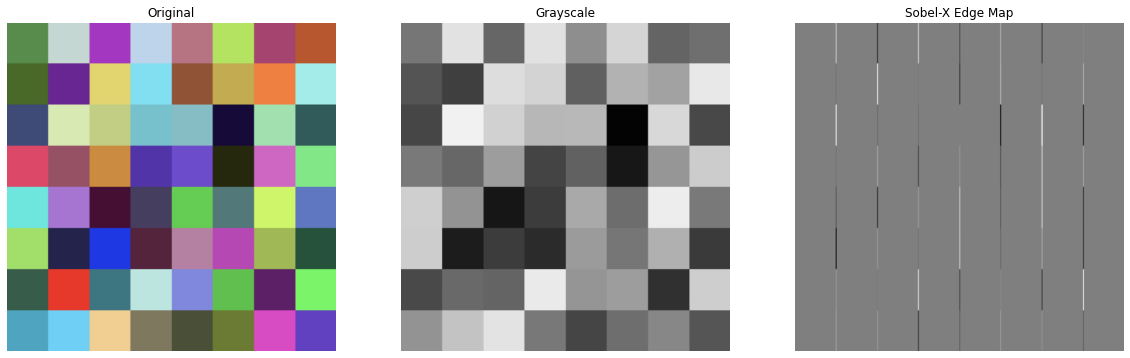

In [ ]:
# Define a Sobel-X kernel.
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobelx = cv2.filter2D(src = img_gray, ddepth = cv2.CV_64F, kernel = kernel)

plt.figure(figsize = (20,12))
plt.subplot(131); plt.axis('off'); plt.imshow(img[:,:,::-1]); plt.title('Original')
plt.subplot(132); plt.axis('off'); plt.imshow(img_gray);      plt.title('Grayscale')
plt.subplot(133); plt.axis('off'); plt.imshow(sobelx);        plt.title('Sobel-X Edge Map');

# 2. Using Sobel() to Detect Vertical and Horizontal Edges

OpenCV has a dedicated function called `Sobel()` that performs Sobel edge detection which is more conveninet that using the more general `filer2D()` function. Let's see how to use `Sobel()`.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst = cv.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
```

`dst`: output image of the same size and the same number of channels as src .

The function has **4 required arguments**:

 1. `src`: input image.
 2. `ddepth`: is the depth of the destination image.
 3.  `dx`: Horizontal sobel derivative.
 4.  `dy`: Vertical sobel derivative.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`sobel()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

 <hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 2.1 Using Sobel() to Detect Vertical and Horizontal Edges

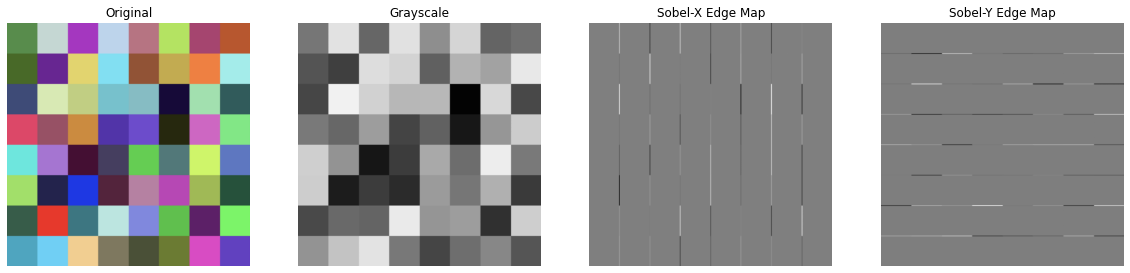

In [ ]:
sobelx  = cv2.Sobel(src = img_gray, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 3)
sobely  = cv2.Sobel(src = img_gray, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 3)

plt.figure(figsize = (20,12))
plt.subplot(141); plt.axis('off'); plt.imshow(img[:,:,::-1]); plt.title('Original')
plt.subplot(142); plt.axis('off'); plt.imshow(img_gray);      plt.title('Grayscale')
plt.subplot(143); plt.axis('off'); plt.imshow(sobelx);        plt.title('Sobel-X Edge Map')
plt.subplot(144); plt.axis('off'); plt.imshow(sobely);        plt.title('Sobel-Y Edge Map');

# 3. Canny Edge Detection

Canny Edge Detection is one of the most popular edge-detection methods in use today because it is so robust and flexible. The algorithm itself follows a three-stage process for extracting edges from an image. Blurring is almost always added as a pre-processing step to reduce noise. This makes it a four-stage process, which includes:

 0. Pre-processing step: Noise Reduction (blurring)
 1. Calculating the intensity gradient of the image (using a Sobel kernel)
 2. Non-maximum Suppression
 3. Hysteresis thresholding

 <hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
edges = cv.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
```

 `edges`:	output edge map; single channels 8-bit image, which has the same size as image .

The function has **3 required arguments**:

1. `src` : Input image.
2. `threshold1`: First threshold for the hysteresis procedure.
3. `threshold2`: Second threshold for the hysteresis procedure.

**NOTE**: The thresholds described above are interchangeable as arguments in the function call. The higher of the two values specified corresponds to the threshold for determining which edges are "Sure Edges" and the lower of the two thresholds is used for determining which edges qualify as candidate edges (if they are determined to be connected to a "Sure Edge"). What this means is that the order of these two arguments does not matter. In this notebook we will simply refer to `thresold1` as the lower threshold and `threshold2` as the upper (or higher) threshold.

<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m8-02-canny-thresholds.png" alt="c0-m8-02-canny-thresholds.png">
</center>
<br>

Edges with intensity gradients greater than the high threshold are considered "Sure Edges." Edges with intensity gardients less than the high threshold, but greater than the low threshold are considered candidate edges. If the candidate edges are connected to a "Sure Edge" then they become a valid edge and are included in the final edge map. All other edges whose intensity gradients are less than the high threshold value are discarded.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`Canny()`**](https://docs.opencv.org/4.5.2/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)

[**`Canny Edge Detection Tutorial`**](https://docs.opencv.org/4.5.2/da/d22/tutorial_py_canny.html)

 <hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 3.1 Canny Edge Detection (simple example with no texture or noise)

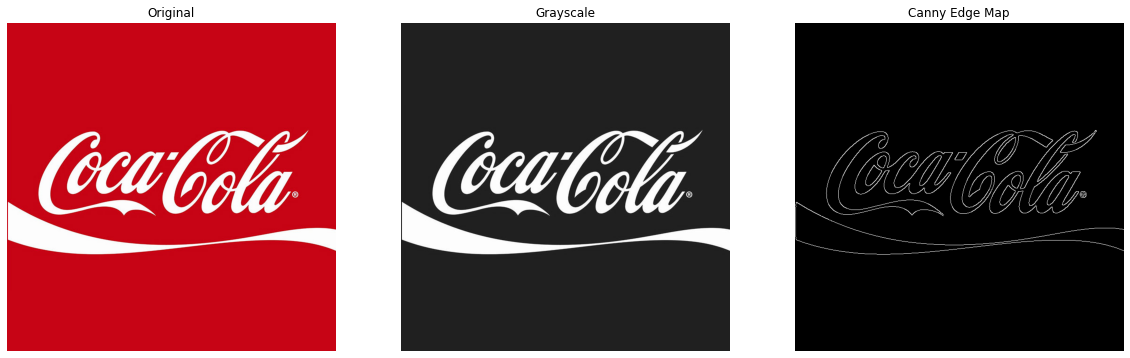

In [ ]:
img = cv2.imread('coca-cola-logo.png')

# Convert to grayscale.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray, threshold1 = 180, threshold2 = 200)

plt.figure(figsize = (20,10))
plt.subplot(131); plt.axis("off"); plt.imshow(img[:,:,::-1]); plt.title('Original')
plt.subplot(132); plt.axis("off"); plt.imshow(img_gray);      plt.title('Grayscale')
plt.subplot(133); plt.axis("off"); plt.imshow(edges);         plt.title('Canny Edge Map');

## 3.2 Effect of Threshold2

The upper threshold (`Threshold2`) determines which edges will be included in the final edge map as "sure-edges" (i.e., those edges whoes intensity gradients exceed the value of `Threshold2`).

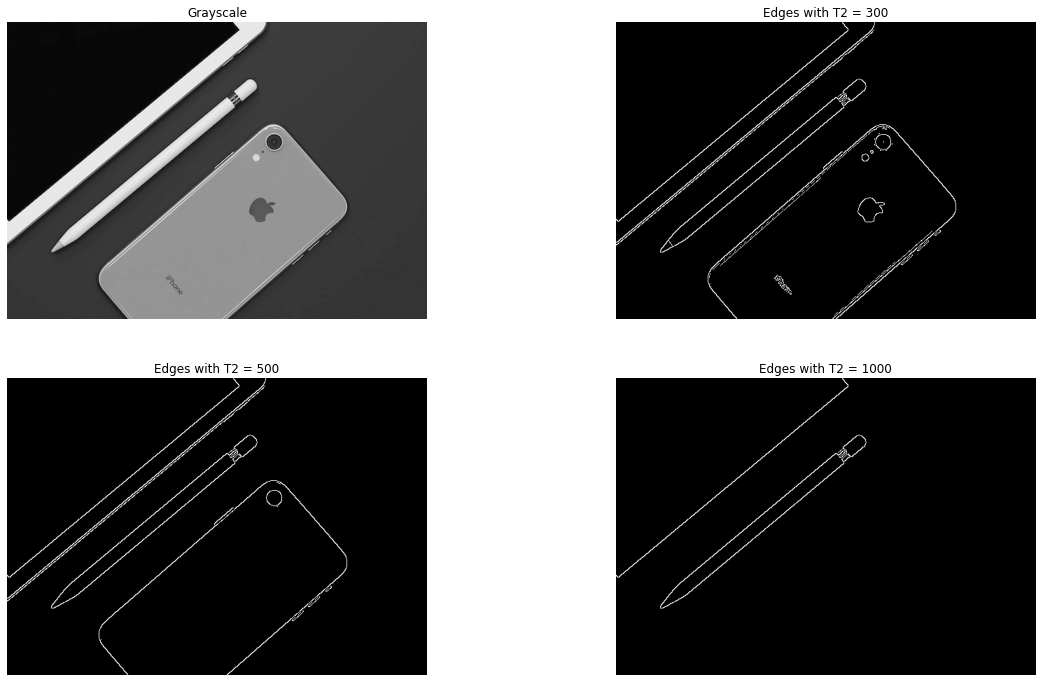

In [ ]:
img = cv2.imread('phone_ipad.jpg')

# Convert to grayscale.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges1 = cv2.Canny(img_gray, threshold1 = 200, threshold2 = 300)
edges2 = cv2.Canny(img_gray, threshold1 = 200, threshold2 = 500)
edges3 = cv2.Canny(img_gray, threshold1 = 200, threshold2 = 1000)

plt.figure(figsize = (20,12))
plt.subplot(221); plt.axis("off"); plt.imshow(img_gray);  plt.title('Grayscale')
plt.subplot(222); plt.axis("off"); plt.imshow(edges1);    plt.title('Edges with T2 = 300')
plt.subplot(223); plt.axis("off"); plt.imshow(edges2);    plt.title('Edges with T2 = 500')
plt.subplot(224); plt.axis("off"); plt.imshow(edges3);    plt.title('Edges with T2 = 1000');

# 4.  Canny Edge Detection (with and without blurring)
This section shows the application of image blurring prior to performing edge detection. We will compare edge detection results with and without blurring.

In [ ]:
# Read image.
img1 = cv2.imread('butterfly.jpg')
img2 = cv2.imread('Large_Scaled_Forest_Lizard.jpg')

# Convert to gray scale.
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

## 4.1  Canny Edge Detection without Blurring

When edge detection is performed on the original image (without any blurring) the algorithm often produces many edges associated with the texture in the image which are not necessarily associated with the edges we often care about.

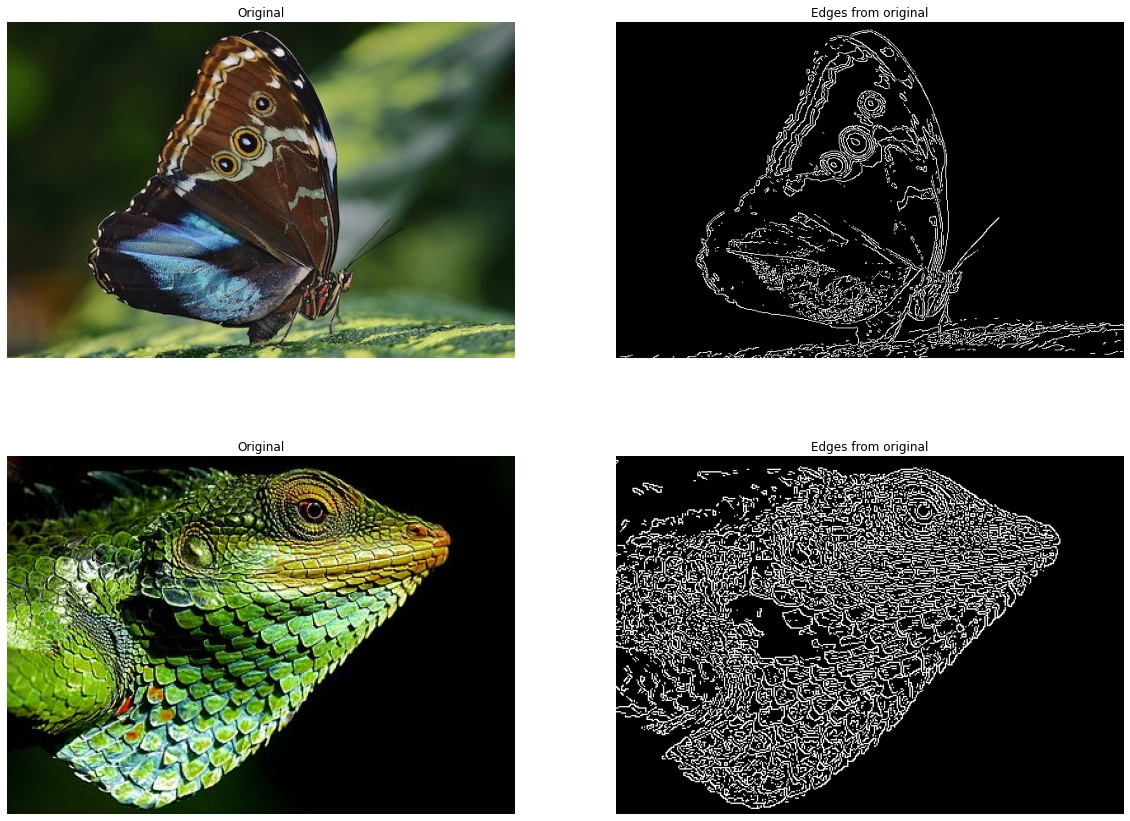

In [ ]:
# Canny Edge detection without blurring.
original_edges_1 = cv2.Canny(img1_gray, threshold1 = 180, threshold2 = 200)
original_edges_2 = cv2.Canny(img2_gray, threshold1 = 180, threshold2 = 200)

# Display.
plt.figure(figsize = (20,15))
plt.subplot(221); plt.axis('off'); plt.imshow(img1[:,:,::-1]);   plt.title('Original')
plt.subplot(222); plt.axis('off'); plt.imshow(original_edges_1); plt.title('Edges from original')

plt.subplot(223); plt.axis('off'); plt.imshow(img2[:,:,::-1]);   plt.title('Original')
plt.subplot(224); plt.axis('off'); plt.imshow(original_edges_2); plt.title('Edges from original');

## 4.2  Canny Edge Detection with Blurring

We apply blurring to smooth out the fine texture and reduce noise in images so that only the predominant edges are detected in the image.

### <font style = "color:rgb(50,120,229)">Apply blurring</font>

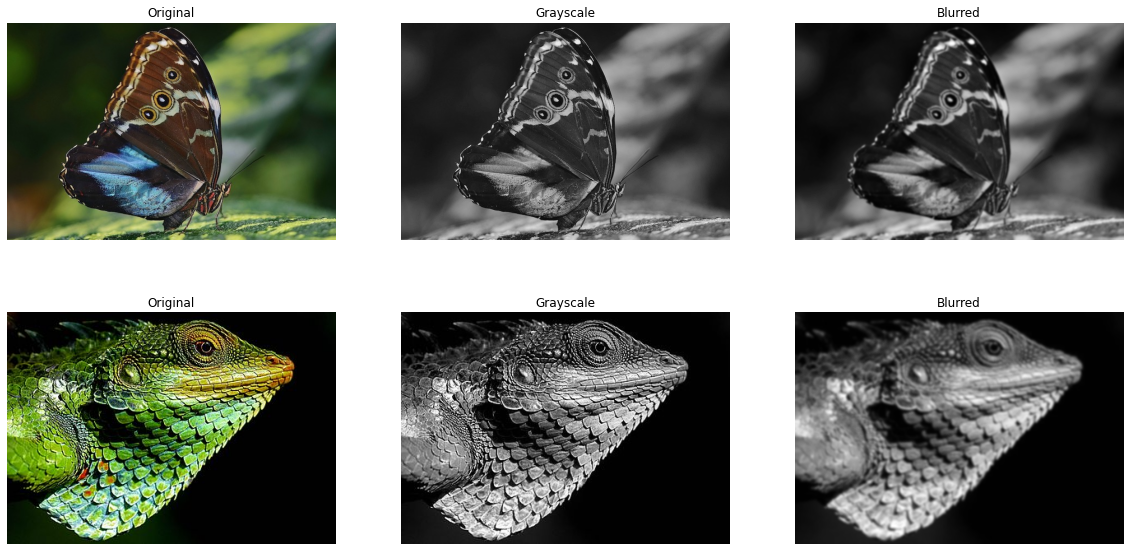

In [ ]:
# Apply Gaussian blur with kernel size 7x7.
img1_blur = cv2.GaussianBlur(img1_gray, (7,7), 0)
# Apply Gaussian blur with kernel size 7x7 as the noise is more.
img2_blur = cv2.GaussianBlur(img2_gray, (7,7), 0)

# Display the images.
plt.figure(figsize = (20, 10))
plt.subplot(231); plt.axis('off'); plt.imshow(img1[:,:,::-1]); plt.title('Original')
plt.subplot(232); plt.axis('off'); plt.imshow(img1_gray);      plt.title('Grayscale')
plt.subplot(233); plt.axis('off'); plt.imshow(img1_blur);      plt.title('Blurred')
plt.subplot(234); plt.axis('off'); plt.imshow(img2[:,:,::-1]); plt.title('Original')
plt.subplot(235); plt.axis('off'); plt.imshow(img2_gray);      plt.title('Grayscale')
plt.subplot(236); plt.axis('off'); plt.imshow(img2_blur);      plt.title('Blurred');

### <font style = "color:rgb(50,120,229)">Perform edge detection using blurred images</font>

Using the blurred image as input eliminates edges associated with very fine texture or noise in the original image.

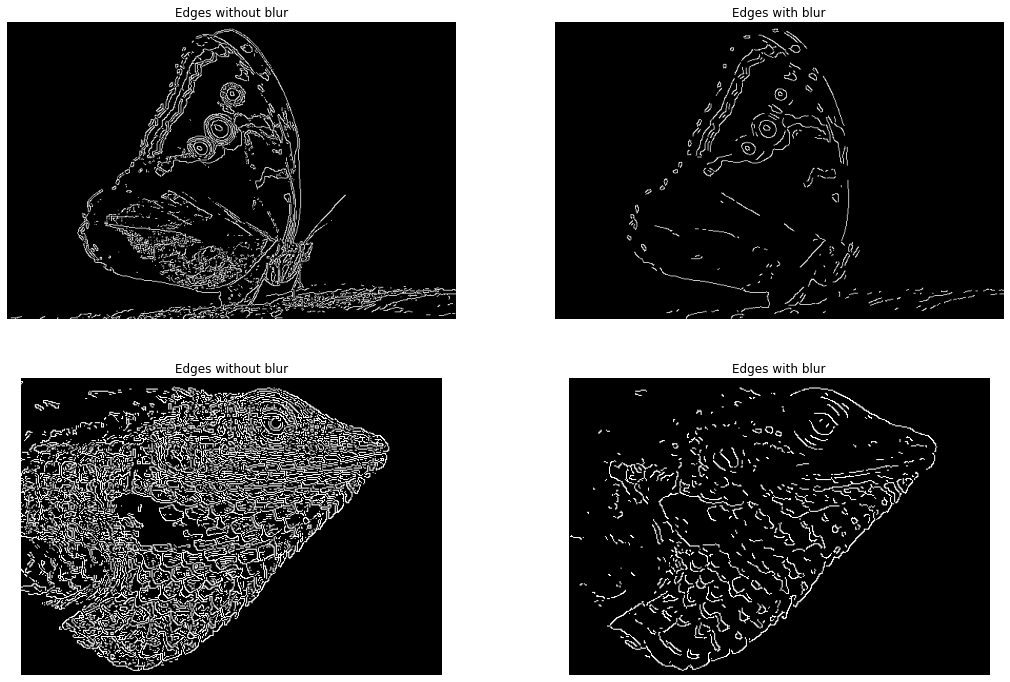

In [ ]:
blurred_edges_1 = cv2.Canny(img1_blur, threshold1 = 180, threshold2 = 200)
blurred_edges_2 = cv2.Canny(img2_blur, threshold1 = 180, threshold2 = 200)

# Display.
plt.figure(figsize = (18,12))
plt.subplot(221); plt.axis('off'); plt.imshow(original_edges_1); plt.title('Edges without blur')
plt.subplot(222); plt.axis('off'); plt.imshow(blurred_edges_1);  plt.title('Edges with blur')
plt.subplot(223); plt.axis('off'); plt.imshow(original_edges_2); plt.title('Edges without blur')
plt.subplot(224); plt.axis('off'); plt.imshow(blurred_edges_2);  plt.title('Edges with blur');

## 4.3 Hysteresis Thresholding Example (effect of Threshold1)
Setting a lower minimum threshold (`threshold1`) allows weaker edges to be included in the final edge map as long as the weaker edge can be associated with a "sure-edge."

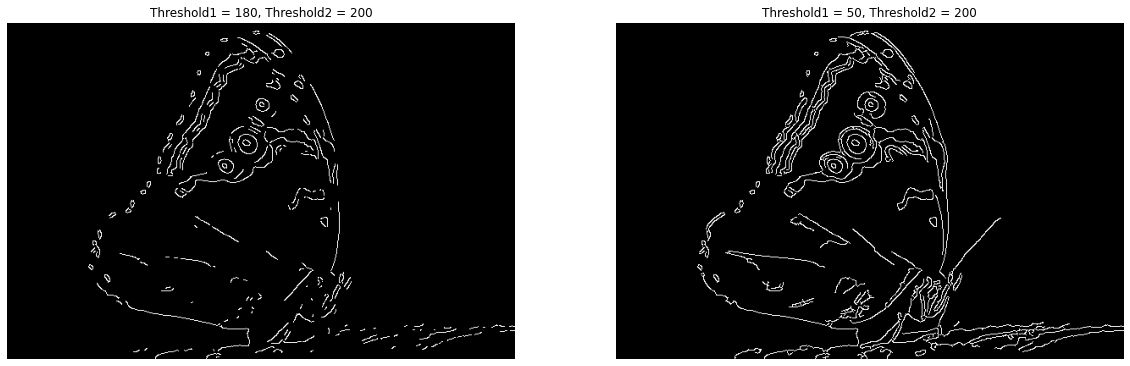

In [ ]:
# Edge detection with a high Threshold1 value.
blurred_edges_tight = cv2.Canny(img1_blur, threshold1 = 180, threshold2 = 200)
# Edge detection with a low Threshold1 value.
blurred_edges_open  = cv2.Canny(img1_blur, threshold1 = 50, threshold2 = 200)

plt.figure(figsize = (20,15))
plt.subplot(121); plt.axis('off'); plt.imshow(blurred_edges_tight); plt.title('Threshold1 = 180, Threshold2 = 200')
plt.subplot(122); plt.axis('off'); plt.imshow(blurred_edges_open);  plt.title('Threshold1 = 50, Threshold2 = 200');

As shown in the images above, the edge map associated with a higher Threshold1 value (left) has many "broken edges." When the Threshold1 value is lowered it allows weaker segments that are assocaited with strong edges to become part of the final edge map as shown to the right. In the right-hand image, you can see more continuous edges.